In [2]:
library(janitor)
library(arrow)
library(dplyr)
library(tibble)
library(data.table)
library(readr)

# library(stringr)
###install.packages("languageserver") - for R extansion in VS code
# install.packages("janitor")
# install.packages("arrow")
# install.packages("dplyr")
# install.packages("tibble")
# install.packages("data.table")
# install.packages("readr")


In [6]:
df1 <- read_parquet("/tank/projects/vpalagina_hobotnica/hobotnica/data_with_HC_imputed/GSE32148.parquet")
library(reticulate) # for python 
use_python("/home/vpalagina/miniconda3/envs/my_env/bin/python", required = TRUE)
source_python("read_pickle.py")
df2 <- read_pickle_file("/tank/projects/vpalagina_hobotnica/hobotnica/data_imputed_with_meta_for_regression_pkl/GSE32148.pickle")

In [8]:
head(df2)

,cg00000029,cg00000108,cg00000109,cg00000165,cg00000236,cg00000289,cg00000292,cg00000321,cg00000363,cg00000622,⋯,rs845016,rs877309,rs9292570,rs9363764,rs939290,rs951295,rs966367,rs9839873,Age,Condition
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
GSM796660,0.53599,0.91759,0.85866,0.19967,0.74830,0.61722,0.81706,0.37256,0.35194,0.01726,⋯,0.40544,0.50740,0.91934,0.52665,0.95103,0.06983,0.50354,0.59608,49,IBD
GSM796661,0.51288,0.90251,0.82595,0.19483,0.72959,0.61576,0.82962,0.37086,0.35784,0.02106,⋯,0.42741,0.49110,0.92444,0.51141,0.94584,0.07401,0.51122,0.59108,49,HC
GSM796662,0.50556,0.91070,0.84799,0.19867,0.74411,0.59409,0.80767,0.26378,0.35900,0.01956,⋯,0.42308,0.51594,0.92105,0.91105,0.52014,0.51397,0.50940,0.90103,43,HC
GSM796663,0.53280,0.92180,0.88189,0.17476,0.73424,0.61752,0.82870,0.29243,0.32664,0.01795,⋯,0.43447,0.51868,0.92616,0.91709,0.53795,0.51322,0.49018,0.89914,43,IBD
GSM796664,0.52627,0.91726,0.86505,0.21113,0.74834,0.65703,0.81330,0.27337,0.36234,0.02402,⋯,0.43955,0.50970,0.48998,0.92633,0.51451,0.92933,0.48832,0.90953,44,IBD
GSM796665,0.52920,0.92142,0.87332,0.20954,0.77799,0.56952,0.84312,0.27363,0.37515,0.01896,⋯,0.41006,0.50606,0.48978,0.92059,0.54319,0.93027,0.50954,0.89877,44,HC



comp 1 
  |======================================================================| 100%
comp 2 
  |======================================================================| 100%
comp 3 
  |======================================================================| 100%


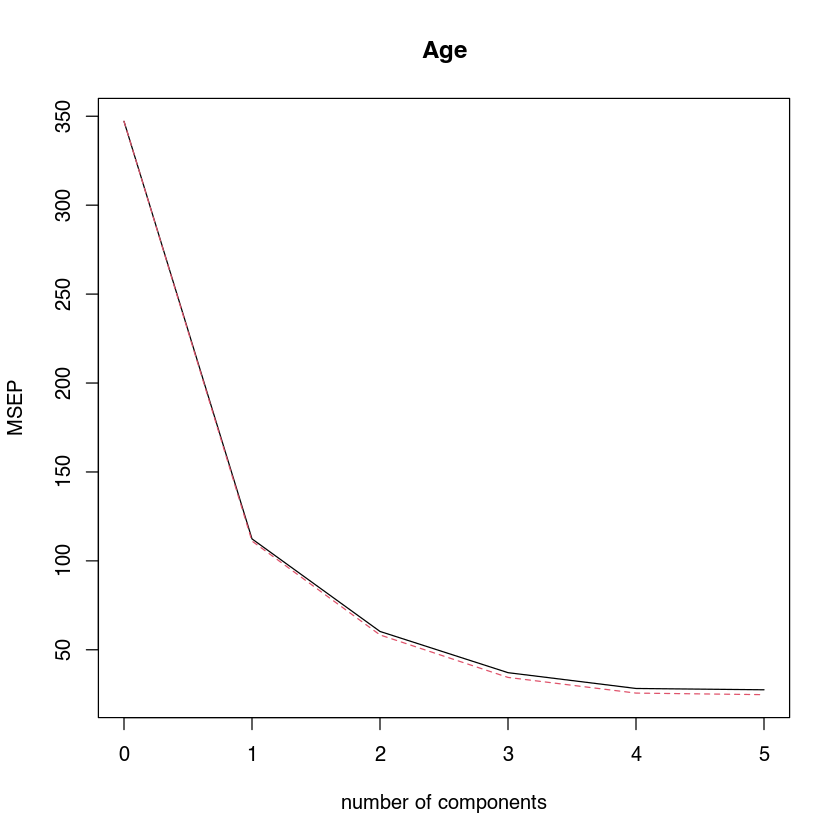

[1] "Overall Accuracy: 78.26 %"


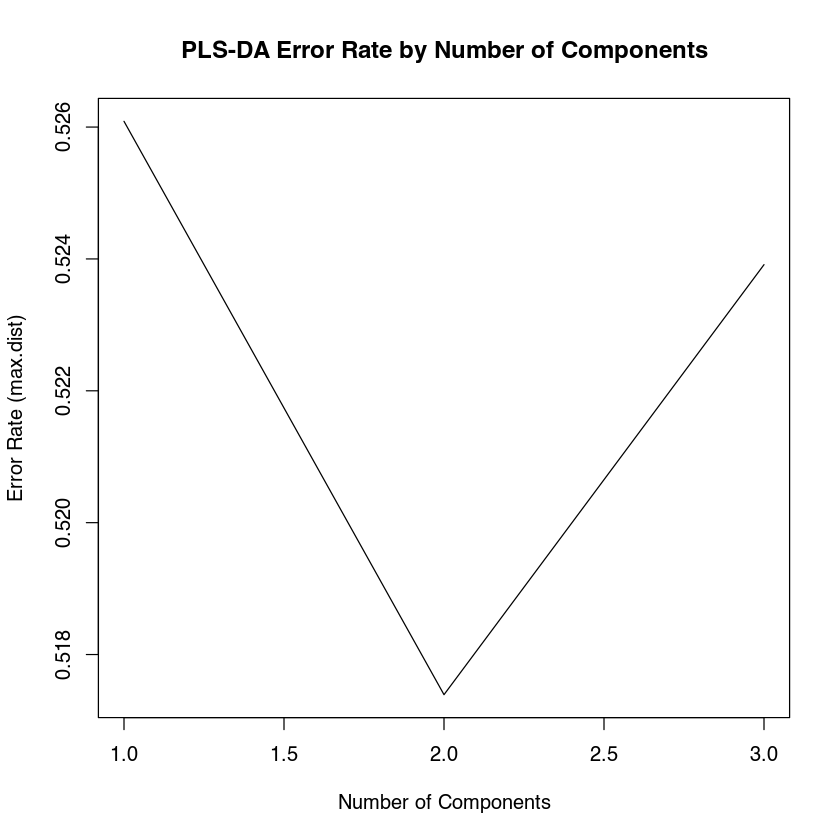

In [68]:
# library(mixOmics)
# library(pls)

# data <- read.csv('/tank/projects/vpalagina_hobotnica/hobotnica/clocks/PhenoAgeV2/datasets_PhenoAgeV2_imputed_NA/GSE32148')

# data$Condition <- as.factor(data$Condition)
# data$Age <- as.numeric(data$Age)

# X <- data[, !(colnames(data) %in% c('Condition', 'Age', "X"))]
# Y <- data$Condition 
# Age <- data$Age 

# #PLS regression with Age as the response variable
# pls_age <- plsr(Age ~ as.matrix(X), ncomp = 5, validation = "CV", scale = TRUE)
# validationplot(pls_age, val.type = "MSEP")

# optimal_ncomp <- 3

# T_scores <- pls_age$scores[, 1:optimal_ncomp, drop = FALSE]
# P_loadings <- pls_age$loadings[, 1:optimal_ncomp, drop = FALSE]
# X_age_variation <- T_scores %*% t(P_loadings)

# X_age_variation <- sweep(X_age_variation, 2, pls_age$Xmeans, "+")
# X_adjusted <- X - X_age_variation
# X_adjusted <- as.data.frame(X_adjusted)

# plsda_model <- plsda(X_adjusted, Y, ncomp = optimal_ncomp, scale = TRUE)
# perf_plsda <- perf(plsda_model, validation = "Mfold", folds = 5, progressBar = TRUE, nrepeat = 10)

# error_rate_max_dist <- perf_plsda$error.rate$overall[, "max.dist"]
# plot(1:length(error_rate_max_dist), error_rate_max_dist, type = 'l', 
#      xlab = "Number of Components", ylab = "Error Rate (max.dist)",
#      main = "PLS-DA Error Rate by Number of Components")


# predictions <- predict(plsda_model, X_adjusted)
# confusion_matrix <- table(Y, predictions$class$max.dist[, optimal_ncomp])
# accuracy <- sum(diag(confusion_matrix)) / sum(confusion_matrix)
# print(paste("Overall Accuracy:", round(accuracy * 100, 2), "%"))

In [130]:
##Checks on control only HC1-2
# library(mixOmics)
# library(pls)

# input_folder <- "/tank/projects/vpalagina_hobotnica/hobotnica/clocks/PhenoAgeV2/multi_regression/methylation_prediction/regres_on_HC_only/initial_ds" ##HC1-2 from multiple lin reg for methylation prediction
# output_folder <- "/tank/projects/vpalagina_hobotnica/hobotnica/clocks/PhenoAgeV2/PLS_DA/HC_only/no_age"

# process_file <- function(file_path) {
#     data <- read.csv(file_path, row.names=1)

#     data$Condition <- as.factor(data$Condition)
#     data$Age <- as.numeric(data$Age)

#     X <- data[, !(colnames(data) %in% c('Condition', 'Age'))]
#     Y <- data$Condition
#     Age <- data$Age

#     pls_age <- plsr(Age ~ as.matrix(X), ncomp = 5, validation = "CV", segments = min(5, nrow(X)), scale = TRUE)
#     optimal_ncomp <- 3 

#     T_scores <- pls_age$scores[, 1:optimal_ncomp, drop = FALSE]
#     P_loadings <- pls_age$loadings[, 1:optimal_ncomp, drop = FALSE]
#     X_age_variation <- T_scores %*% t(P_loadings)
#     X_age_variation <- sweep(X_age_variation, 2, pls_age$Xmeans, "+")
#     X_adjusted <- X - X_age_variation
#     X_adjusted <- cbind(Names = rownames(data), X_adjusted)

#     X_adjusted$Condition <- Y
#     X_adjusted$Age <- Age
#     result <- data.frame(X_adjusted)

#     output_file_path <- file.path(output_folder, basename(file_path))
#     write.csv(result, output_file_path, row.names = FALSE)
# }

# file_list <- list.files(input_folder, full.names = TRUE)
# lapply(file_list, process_file)


In [ ]:
###Initial data 
# library(mixOmics)
# library(pls)

# input_folder <- "/tank/projects/vpalagina_hobotnica/hobotnica/clocks/PhenoAgeV2/datasets_PhenoAgeV2_imputed_NA"
# output_folder <- "/tank/projects/vpalagina_hobotnica/hobotnica/clocks/PhenoAgeV2/PLS_DA/no_age_ds"

# process_file <- function(file_path) {
#     data <- read.csv(file_path, row.names=1)

#     data$Condition <- as.factor(data$Condition)
#     data$Age <- as.numeric(data$Age)

#     X <- data[, !(colnames(data) %in% c('Condition', 'Age'))]
#     Y <- data$Condition
#     Age <- data$Age

#     pls_age <- plsr(Age ~ as.matrix(X), ncomp = 5, validation = "CV", scale = TRUE)
#     optimal_ncomp <- 3 

#     T_scores <- pls_age$scores[, 1:optimal_ncomp, drop = FALSE]
#     P_loadings <- pls_age$loadings[, 1:optimal_ncomp, drop = FALSE]
#     X_age_variation <- T_scores %*% t(P_loadings)
#     X_age_variation <- sweep(X_age_variation, 2, pls_age$Xmeans, "+")
#     X_adjusted <- X - X_age_variation
#     X_adjusted <- cbind(Names = rownames(data), X_adjusted)

#     X_adjusted$Condition <- Y
#     X_adjusted$Age <- Age
#     result <- data.frame(X_adjusted)

#     output_file_path <- file.path(output_folder, basename(file_path))
#     write.csv(result, output_file_path, row.names = FALSE)
# }

# file_list <- list.files(input_folder, full.names = TRUE)
# lapply(file_list, process_file)

In [3]:
# #filtering datasets without control samples
# library(stringr)
# data_folder <- "/tank/projects/vpalagina_hobotnica/hobotnica/data"
# output <- "/tank/projects/vpalagina_hobotnica/hobotnica/data with HC"

# files <- list.files(data_folder, pattern = "*.parquet")

# #ds with No HC condition:
# exception_ds<- c("GSE100264", "GSE103929", "GSE107080", "GSE112596", "GSE117859", "GSE117860", "GSE130491", "GSE131461",
#  "GSE137593", "GSE137594", "GSE138653", "GSE140800", "GSE151355", "GSE176168", "GSE185389", "GSE185390", "GSE203399", 
#  "GSE228104", "GSE43976", "GSE53840", "GSE53841", "GSE62003", "GSE62867", "GSE69138")

# # Iterate through the files
# for (file in files) {
  
#   # Construct the full file path
#   file_path <- file.path(data_folder, file)
  
#   # Extract the middle part of the filename
#   middle_part <- stringr::str_extract(file, "GSE[0-9]+")
  
#   # Extract the middle part of the filename
#   middle_part <- str_extract(file, "GSE[0-9]+")
  
#   if (!(middle_part %in% exception_ds)) {
#     # If not in the exception list, copy the file to the new folder
#     new_file_path <- file.path(output, paste0(middle_part, ".parquet"))
#     file.copy(file_path, new_file_path, overwrite = TRUE)
#   }
#   }

In [8]:
# #Removing sites from sex chromosomes
# library(arrow)
# library(dplyr)
# library(stringr)

# # Define the data folder
# data_folder <- "/tank/projects/vpalagina_hobotnica/hobotnica/data with HC"

# # List all Parquet files in the data folder
# files <- list.files(data_folder, pattern = "*.parquet")

# # Iterate through the files
# for (file in files) {
  
#   # Construct the full file path
#   file_path <- file.path(data_folder, file)
  
#   # Read the Parquet file
#   data <- read_parquet(file_path)
  
#   # Remove rows where the first column contains the "ch.X." or "ch.Y." pattern
#   data <- data %>% filter(!str_detect(.[[1]], "^ch\\.X\\.|^ch\\.Y\\."))

#   # Write the modified data back to the original file
#   write_parquet(data, file_path)
# }

In [21]:
#Preparation dataset with molecular clock model sites only!
#Here I remove the rest of sites, calculate the sum of extracted sites and save new datasets into new folder

data_folder <- "/tank/projects/vpalagina_hobotnica/hobotnica/data_with_HC_imputed"
datasets_PhenoAge <- "/tank/projects/vpalagina_hobotnica/hobotnica/clocks/Zhang19_EN/datasets_Zhang19_EN"

files <- list.files(data_folder)
sites <- read.table("/tank/projects/vpalagina_hobotnica/hobotnica/clocks/Zhang19_EN/Zhang19_EN_sites.txt", header = FALSE, sep = "\n")

output <- list()

for (i in 1:length(files)) {

  file_path <- file.path(data_folder, files[i])

  data <- read_parquet(file_path)

    if (colnames(data)[1] != "index") {
    colnames(data)[1] <- "index"
    warning(paste("First column renamed to 'index' in file:", files[i]))
  }

  sum_of_sites <- sum(data$index %in% sites$V1)
  
  # Check if there are matches between data$index and sites$V1
  matching_indices <- data$index %in% sites$V1
  if (sum(matching_indices) == 0) {
    warning(paste("No matches found in file:", files[i]))
    break
  }
  cpgs <- as.data.frame(data[matching_indices,])
  row.names(cpgs) <- cpgs$index
  cpgs <- t(cpgs)[-1, ]
  cpgs <- as.data.frame(cpgs)

  #extract datasets infromation from meta data
  meta <- read.table("computage_bench_meta.tsv", sep = "\t", header = TRUE)
  meta <- meta[,c("SampleID", "Condition", "Age", "Gender")]
  meta <- meta[meta$SampleID %in% rownames(cpgs),]
  meta <- meta %>% distinct(SampleID, .keep_all = TRUE)
  rownames(meta) <- meta$SampleID
  meta <- meta[, -c(1)]

  # #Create a final version of dataset with PhenoAge sites and meta data
  cpgs <- rownames_to_column(cpgs, var = "index")
  meta <- rownames_to_column(meta, var = "index")
  # Merge dataframes by the index column
  meta_and_cpgs <- merge(cpgs, meta, by = "index")
  rownames(meta_and_cpgs) <- meta_and_cpgs$index
  meta_and_cpgs <- meta_and_cpgs[, -c(1)]

  # Extract the middle part of the filename
  filename <- files[i]
  middle_part <- stringr::str_extract(filename, "GSE[0-9]+")

  new_filename <- paste0(middle_part)
  dest_file_path <- file.path(datasets_PhenoAge, new_filename)
  
  write.csv(meta_and_cpgs, file = dest_file_path)
  output[[new_filename]] <- list(status = "processed", sum_of_sites = sum_of_sites)
}
output_lines <- sapply(names(output), function(name) {
  paste(name, "Status:", output[[name]]$status, "Sum of sites:", output[[name]]$sum_of_sites, "\n")
})
writeLines(output_lines, "/tank/projects/vpalagina_hobotnica/hobotnica/clocks/Zhang19_EN/sum_of_sites.txt")

In [3]:
Hobotnica <- function(distMatrix, annotation){
    if (typeof(annotation) == "list") {
        annotation <- as.vector(unlist(annotation))
    } else {
        annotation <- as.vector(annotation)
    }
    rank.m <- as.matrix(distMatrix) # transform distance matrix to matrix object
    rank.m[lower.tri(rank.m)] <- rank(rank.m[lower.tri(rank.m)]) # transform distances to ranks
    rank.m[upper.tri(rank.m)] <- rank(rank.m[upper.tri(rank.m)]) #

    inclass_sum <- 0
    classes <- unique(annotation) # unique classes
    Ns <- vector()

    for (i  in 1:length(classes)){

        clas <- classes[i]
        class_samples <- which(annotation == clas)
        l_tmp <- length(class_samples)
        Ns[i] <- l_tmp
        tmp_sum_inclass <- sum(rank.m[class_samples,class_samples]) # sum of ranks, describing in-class distances
        inclass_sum <- inclass_sum + tmp_sum_inclass


    }
    Ns_sum <- sum(Ns)
    biggest_bossible_rank <-  Ns_sum * (Ns_sum - 1)/2
    number_of_unique_inclass_elements <-  sum(Ns * (Ns-1))/2
    maximal_value <- number_of_unique_inclass_elements * (2*biggest_bossible_rank - number_of_unique_inclass_elements + 1)
    minimal_value <- number_of_unique_inclass_elements* (1 + number_of_unique_inclass_elements)

    normalization_factor <- maximal_value - minimal_value
    return (max(0, 1 - (inclass_sum - minimal_value)/normalization_factor ))

}


In [4]:
#generate condition permutation
library(doParallel)
library(dplyr)

RandomeDistribution <- function(distMatrix, annotation, nPermutations) {
    if (length(dim(distMatrix)) != 2) {
        stop("The distMatrix dim length should be equal 2, stopping.")
    }
    if (dim(distMatrix)[1] != dim(distMatrix)[2]) {
        stop("distMatrix should be a square matrix, stopping")
    }
    nCores = detectCores() - 16
    cl <- parallel::makeForkCluster(nCores)
    doParallel::registerDoParallel(cl)
    
    H_scores <- foreach (i = 1:nPermutations, .packages = c("dplyr"),
                      .export = c("Hobotnica"),
                      .combine = 'c') %dopar% {
        permutedAnnotation <- sample(annotation, length(annotation), replace=FALSE)
        H_result <- Hobotnica(distMatrix, permutedAnnotation)
        
        return(H_result)
    }
    stopCluster(cl)
    return(H_scores)
}


Loading required package: foreach

Loading required package: iterators

Loading required package: parallel



In [4]:
# #Function for parallel computation subset_matrixes
# library(foreach)
# library(doParallel)
# library(amap)

# ParallelHobotnica <- function(folder_csv_matrices){

# n_cores <- detectCores() - 16 #sum = 48 cores
# cl <- makeCluster(n_cores)
# registerDoParallel(cl)

# csv_files <- list.files(folder_csv_matrices, full.names = TRUE)

# # Parallel computation of H_scores for each DistMatrix
# H_scores <- foreach(i = 1:length(csv_files), .packages = c("amap", "dplyr"),
#                     .export = c("kendall_dist", "Hobotnica"),
#                     .combine = c) %dopar% {
  
#   subset_matrix <- read.csv(csv_files[i], row.names = 1)
#   annotation <- subset_matrix$Condition
#   matrix <- subset_matrix %>% select(-Condition, -Age)
#   DistMatrix <- kendall_dist(matrix)
#   H_result <- Hobotnica(DistMatrix, annotation)
#   return(H_result)
# }
# stopCluster(cl)

# return(H_scores)

# }

Loading required package: iterators

Loading required package: parallel



In [5]:
# GenerateRandomSignature <- function(dataset_path, n_sites, n_permutations, sample_id) {
  
#   library(reticulate) # for python 
#   use_python("/home/vpalagina/miniconda3/envs/my_env/bin/python", required = TRUE)
#   source_python("read_pickle.py")

#   dataset <- read_pickle_file(dataset_path)
#   annotation <- dataset %>% select(Condition)
#   data <- dataset %>% select(-Condition, -Age)
#   ann_and_age <- dataset %>% select(Condition, Age)
  
#   for (i in 1:n_permutations) {d
#     random_columns <- sample(colnames(data), n_sites, replace = FALSE)
#     subset_matrix <- data[, random_columns, drop = FALSE]
#     sig_matrix <- cbind(subset_matrix, ann_and_age)
#     column_names_file <- sprintf("/tank/projects/vpalagina_hobotnica/hobotnica/PhenoAgeV2_res_imputed_rand_signature/signature/%s/signature_%03d.txt", sample_id, i)
#     subset_matrix_file <- sprintf("/tank/projects/vpalagina_hobotnica/hobotnica/PhenoAgeV2_res_imputed_rand_signature/sig_matrix/%s/subset_matrix_%03d.csv", sample_id, i)
    
#     # Ensure the directories exist
#     dir.create(dirname(column_names_file), recursive = TRUE, showWarnings = FALSE)
#     dir.create(dirname(subset_matrix_file), recursive = TRUE, showWarnings = FALSE)
    
#     # Write random column names and subset matrix
#     writeLines(random_columns, con = column_names_file)
#     write.csv(sig_matrix, file = subset_matrix_file, row.names = TRUE)
#     }
#   }

In [5]:
library(amap)
#Kendall distances fucntion

kendall_dist <- function(ds_samples) {
    ds_samples <- as.data.frame(ds_samples)
    if ("Condition" %in% colnames(ds_samples) || "Age" %in% colnames(ds_samples)) {
        matrix <- dplyr::select(ds_samples, -Condition, -Age)
    } else {
        matrix <- ds_samples
    }
    distMatrix <- Dist(matrix, method = "kendall", nbproc = 32) 
    return(distMatrix)
}

In [13]:
# ###создание случайных матриц размером по длине часов

# dataset_for_submatrix <- "/tank/projects/vpalagina_hobotnica/hobotnica/data_imputed_with_meta_for_regression_pkl"
# path_signature <- "/tank/projects/vpalagina_hobotnica/hobotnica/PhenoAgeV2_res_imputed_rand_signature/signature"
# path_sig_matrix <- "/tank/projects/vpalagina_hobotnica/hobotnica/PhenoAgeV2_res_imputed_rand_signature/sig_matrix"
# PhenoAgeV2_ds_names <- "/tank/projects/vpalagina_hobotnica/hobotnica/datasets_PhenoAgeV2_imputed_NA"

# file_list <- list.files(path = dataset_for_submatrix, full.names = TRUE)
# file_list_for_names <- list.files(path = PhenoAgeV2_ds_names, full.names = TRUE)
# for (i in 1:length(file_list)){
#   file <- file_list[i]
#   file2 <- file_list_for_names[i]
#   sample_id <- basename(file2)
#   pickle_file_path <- file.path(dataset_for_submatrix, paste0(sample_id, ".pickle"))
#   GenerateRandomSignature(pickle_file_path, 959, 1000, sample_id)
# }


# ###расчет h-scores
# #Function for parallel computation subset_matrixes
# path_sig_matrix <- "/tank/projects/vpalagina_hobotnica/hobotnica/PhenoAgeV2_res_imputed_rand_signature/sig_matrix"
# PhenoAgeV2_ds <- "/tank/projects/vpalagina_hobotnica/hobotnica/datasets_PhenoAgeV2_imputed_NA"

# folder_list <- list.dirs(path_sig_matrix, full.names = TRUE, recursive = FALSE)
# file_list_PhenoAge <- list.files(path = PhenoAgeV2_ds, full.names = TRUE)

# result_table <- data.frame(
#   Dataset_ID = character(), 
#   H_score = numeric(), 
#   p_value = numeric(), 
#   stringsAsFactors = FALSE
# )
# for (i in 1:length(file_list_PhenoAge)) {
#     file1 <- file_list_PhenoAge[i]
#     data <- read.csv(file1, sep = ",", header = TRUE, row.names = 1)
#     annotation <- data$Condition
#     distMatrix <- kendall_dist(data)
#     h_score <- Hobotnica(distMatrix, annotation)
#     sample_id1 <- basename(file1)

#     matching_folder <- folder_list[basename(folder_list) == tools::file_path_sans_ext(sample_id1)]
#     if (length(matching_folder) > 0) {
#         folder <- matching_folder[1]
#         H_score_distrib <- ParallelHobotnica(folder)
#         pval <- (1 + sum(H_score_distrib >= h_score)) / length(H_score_distrib)
#         result_table <- result_table %>%
#           add_row(Dataset_ID = sample_id1, H_score = h_score, p_value = pval)
#     } else {
#         warning(paste("No matching folder found for", sample_id1))
#     }
# }

# write.csv(result_table, "/tank/projects/vpalagina_hobotnica/hobotnica/PhenoAgeV2_res_imputed_rand_signature/PhenoAgeV2_H_scores.csv", row.names = FALSE)


# #### создание сабматриц из исходных файлов
# library(reticulate) # for python 
# use_python("/home/vpalagina/miniconda3/envs/my_env/bin/python", required = TRUE)
# source_python("read_pickle.py")

# dataset_for_submatrix <- "/tank/projects/vpalagina_hobotnica/hobotnica/data_imputed_with_meta_substracted_age"
# path_signature <- "/tank/projects/vpalagina_hobotnica/hobotnica/PhenoAgeV2_res_imputed_rand_signature/signature"
# output_submatrices <- "/tank/projects/vpalagina_hobotnica/hobotnica/PhenoAgeV2_res_imputed_rand_signature/sig_matrix_no_age"

# signature_folders <- list.files(path = path_signature, full.names = TRUE)

# for (sig_folder in signature_folders) {
#   sample_id <- basename(sig_folder)
#   signature_files <- list.files(path = sig_folder, pattern = "\\.txt$", full.names = TRUE)
#   pickle_file_path <- file.path(dataset_for_submatrix, paste0(sample_id, ".pickle"))
#   data <- read_pickle_file(pickle_file_path)
#   output_directory <- file.path(output_submatrices, sample_id)
#   dir.create(output_directory, recursive = TRUE, showWarnings = FALSE)

#   for (sig_file in signature_files) {
#     random_columns <- readLines(sig_file)
#     subset_matrix <- data[, random_columns, drop = FALSE]
#     file_index <- basename(sig_file)
#     submatrix_file <- file.path(output_directory, sprintf("subset_matrix_%s.csv", file_index))
#     write.csv(subset_matrix, file = submatrix_file, row.names = TRUE)
#   }
# }

In [6]:
##функция для подсчета распределния после рандомного подбора аннотаций(рандом дистрибьюшен)
distrib_and_hobot <- function(distMatrix, annotation, number) {
    h_val <- Hobotnica(distMatrix, annotation)
    distMatrix_2 = as.matrix(distMatrix)
    distribution <- RandomeDistribution(distMatrix_2, annotation, number)
    pval <- (1+ sum(distribution >= h_val))/number
    result <- list(pval = pval, h_val = h_val, random_h_scores = distribution)
    return(result)
}

In [7]:
##graph for randome distribution visualization 
library(ggplot2)

plot_distrib <- function(random_h_scores, real_h_score, pval) {
  random_h_scores <- as.numeric(random_h_scores)
  real_h_score <- as.numeric(real_h_score)
  pval <- pval

  hist_data <- hist(random_h_scores, breaks = seq(0, 1, by = 0.001), plot = FALSE)

  normalized_counts <- hist_data$counts / sum(hist_data$counts)

  data <- data.frame(h_scores = hist_data$mids, normalized_counts = normalized_counts)

  plot <- ggplot(data = data, aes(x = h_scores, y = normalized_counts)) +
    geom_bar(stat = "identity", fill = "skyblue", color = "black", alpha = 0.9) +
    
    geom_vline(aes(xintercept = real_h_score), color = "red", linetype = "dashed", size = 0.7) +
    
    labs(title = "Normalized Distribution of Random h_scores with Real h_score Highlighted",
         x = "Distribution of Random H-scores",
         y = "Normalized Frequency") +

    annotate("text", x = real_h_score - 0.001, 
             y = max(normalized_counts), 
             label = paste("H-score =", real_h_score, "\np-value =", pval), 
             color = "red", vjust = + 1.0) +
    
    # Set fixed x and y limits
    xlim(c(0, 1))  +
    ylim(c(0, max(normalized_counts)))
           
  return(plot)
}

In [8]:
#PCA function for plotting

library(ggplot2)
library(dplyr)
library(ggfortify)

PCA_my_plot <- function(data, filename, phrase){

  # Select columns for PCA, excluding 'Condition' and 'Age'
  pca_data <- data %>% select(-Condition, -Age)

  # Convert all columns to numeric
  pca_data <- pca_data %>% mutate_all(as.numeric)

  # # Replace infinite values with NA
  # pca_data[!is.finite(as.matrix(pca_data))] <- NA

  # total_columns <- ncol(pca_data)
  # pca_data_clean <- pca_data %>% select_if(~ all(!is.na(.)))

  # Perform PCA
  pca_result <- prcomp(pca_data, center = TRUE, scale. = TRUE)

  # Plot the PCA result with percentage of removed columns as subtitle
   p <- autoplot(pca_result, data = data, colour = 'Condition') +
    labs(title = filename, subtitle = paste0(phrase)) +
    theme(plot.title = element_text(hjust = 0.5),
          plot.subtitle = element_text(hjust = 0.5))

  return(p)
}

In [8]:
# ###Scatter plots for datasets results visualization
# library(dplyr)
# library(ggplot2)

# # Read the CSV file
# result <- read.csv("/tank/projects/vpalagina_hobotnica/hobotnica/PhenoAgeV2/multi_regression/delta_results/delta_final_res.csv", sep = ",", header = TRUE)

# x <- result$H_score
# y <- result$H_score_no_Age
# data <- data.frame(x = x, y = y)

# data$position <- ifelse(data$y > data$x, "No age > With age", "No age < With age")
# data$position <- factor(data$position, levels = c("No age > With age", "No age < With age"))

# calcul <- sum(data$y > data$x)
# scatter_plot <- ggplot(data, aes(x = x, y = y)) +
#   geom_point(aes(color = position), size = 3) +  
#   geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "black") +  # Line where x = y
#   labs(title = paste("sum of H-scores without age > with age =", calcul), 
#        x = "H-score of initial data",
#        y = "H-score after removal Age variable") +
#   scale_color_manual(values = c("No age > With age" = "#43ad43", "No age < With age" = "#ff0000fc")) +  # Color points
#   theme_minimal() + theme()

# print(scatter_plot)

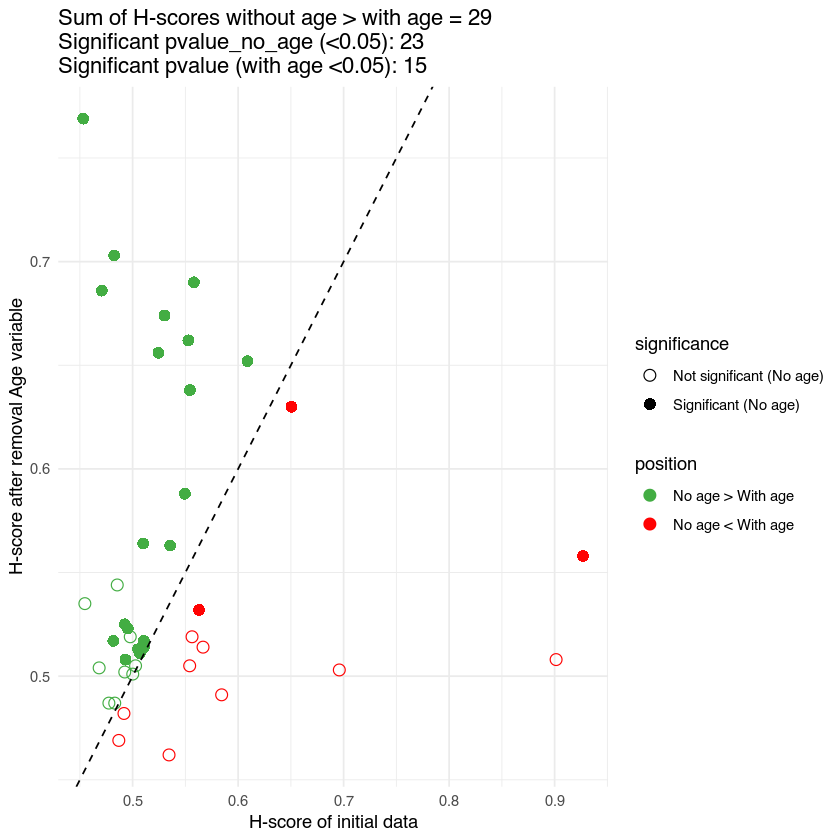

In [23]:
library(dplyr)
library(ggplot2)

# Read the CSV file
result <- read.csv("/tank/projects/vpalagina_hobotnica/hobotnica/clocks/YingCausAge/final_res.csv", sep = ",", header = TRUE)

# Extract columns for plotting
x <- result$H_score
y <- result$H_score_no_Age
pvalue <- result$p_value
pvalue_no_age <- result$p_value_no_Age

# Create a data frame with relevant information
data <- data.frame(x = x, y = y, pvalue = pvalue, pvalue_no_age = pvalue_no_age)

# Add a column for significant p-values
data$significance <- ifelse(data$pvalue_no_age < 0.05, "Significant (No age)", "Not significant (No age)")
data$position <- ifelse(data$y > data$x, "No age > With age", "No age < With age")
data$position <- factor(data$position, levels = c("No age > With age", "No age < With age"))

# Calculate how many points have pvalue_no_age significant
calcul <- sum(data$y > data$x)
significant_count <- sum(data$pvalue_no_age < 0.05)
significant_with_age_count <- sum(data$pvalue < 0.05)
# Plot
scatter_plot <- ggplot(data, aes(x = x, y = y)) +
  geom_point(aes(color = position, shape = significance), size = 3) +  
  geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "black") +  # Line where x = y
  labs(title = paste("Sum of H-scores without age > with age =", calcul,
                     "\nSignificant pvalue_no_age (<0.05):", significant_count,
                     "\nSignificant pvalue (with age <0.05):", significant_with_age_count),
       x = "H-score of initial data",
       y = "H-score after removal Age variable") +
  scale_color_manual(values = c("No age > With age" = "#43ad43", "No age < With age" = "#ff0000fc")) +  # Color points
  scale_shape_manual(values = c("Significant (No age)" = 16, "Not significant (No age)" = 1)) +  # Shape based on significance
  theme_minimal() + theme()

print(scatter_plot)

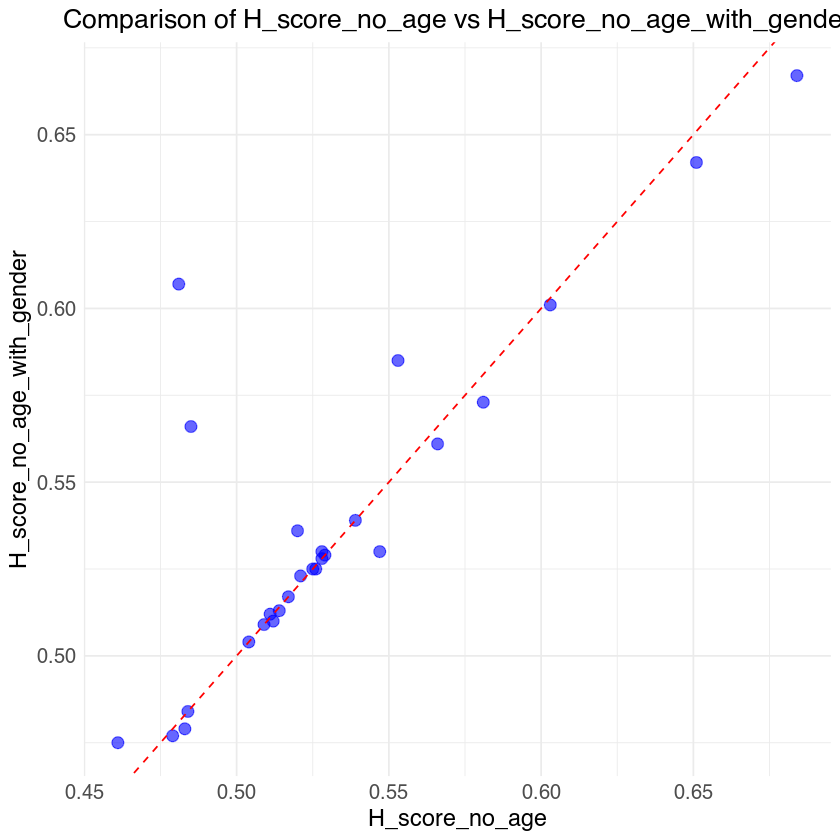

In [12]:
# # Assuming final_df is already loaded in your R environment

# # Create a scatter plot to compare the two H-scores
# final_df = read.csv("/tank/projects/vpalagina_hobotnica/hobotnica/clocks/PhenoAgeV2/gender/methylation_with_b0_substract_for_ds_with_gender/res_for_plots.csv")
# ggplot(final_df, aes(x = H_score_no_Age, y = H_score_no_Age_with_gender)) +
#   geom_point(color = "blue", size = 3, alpha = 0.6) +  # Scatter plot points
#   geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "red") +  # Line of equality
#   labs(
#     title = "Comparison of H_score_no_age vs H_score_no_age_with_gender",
#     x = "H_score_no_age",
#     y = "H_score_no_age_with_gender"
#   ) +
#   theme_minimal() +
#   theme(
#     plot.title = element_text(hjust = 0.5, size = 16),
#     axis.title = element_text(size = 14),
#     axis.text = element_text(size = 12)
#   )

In [9]:
##H-score distribution for ds
library(dplyr)
library(ggplot2)
library(ggfortify)
library(gridExtra)
library(grid)

substracted_age <- "/tank/projects/vpalagina_hobotnica/hobotnica/clocks/PhenoAgeV2/gender/methylation_with_b0_substract_for_ds_with_gender/no_age"
distribution_path_no_age <- "/tank/projects/vpalagina_hobotnica/hobotnica/clocks/PhenoAgeV2/gender/methylation_with_b0_substract_for_ds_with_gender/distrib_no_age"

file_list <- list.files(path = substracted_age, full.names = TRUE)

# new_result_table <- data.frame(
#   Dataset_ID = character(), 
#   H_score = numeric(), 
#   p_value = numeric(), 
#   stringsAsFactors = FALSE
# )

new_result_table <- data.frame(
  Dataset_ID = character(), 
  H_score_no_Age = numeric(), 
  p_value_no_Age = numeric(), 
  stringsAsFactors = FALSE
)

for (i in 1:length(file_list)) {
  file <- file_list[i]
  data <- read.csv(file, sep = ",", header = TRUE, row.names = 1)

  annotation <- data$Condition
  distMatrix <- kendall_dist(data)
  distrib_result <- distrib_and_hobot(distMatrix, annotation, 1000)
  h_score <- distrib_result$h_val
  p_value <- distrib_result$pval
  sample_id <- basename(file)

  distribution <- distrib_result$random_h_scores
  file_path_for_distrib_no_age <- file.path(distribution_path_no_age, paste0(sample_id))
  write.table(distribution, file = file_path_for_distrib_no_age, row.names = FALSE, col.names = FALSE)

  new_result_table <- new_result_table %>%
    add_row(Dataset_ID = sample_id, H_score_no_Age = h_score, p_value_no_Age = p_value)

}

write.csv(new_result_table, "/tank/projects/vpalagina_hobotnica/hobotnica/clocks/PhenoAgeV2/gender/methylation_with_b0_substract_for_ds_with_gender/H_score_no_age.csv", row.names = FALSE)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [10]:
###подсчет для датасетов, тут считается рандомная аннотация

library(dplyr)
library(ggplot2)
library(ggfortify)
library(gridExtra)
library(grid)

# Define paths to the folders
substracted_age <- "/tank/projects/vpalagina_hobotnica/hobotnica/clocks/GrimAgeV1/no_age"
datasets <- "/tank/projects/vpalagina_hobotnica/hobotnica/clocks/GrimAgeV1/datasets_GrimAgeV1"

distribution_path <- "/tank/projects/vpalagina_hobotnica/hobotnica/clocks/GrimAgeV1/distrib_initial"
distribution_path_no_age <- "/tank/projects/vpalagina_hobotnica/hobotnica/clocks/GrimAgeV1/distrib_no_age"


file_list1 <- list.files(path = datasets, full.names = TRUE)
file_list2 <- list.files(path = substracted_age, full.names = TRUE)

# Check that both directories have the same number of files
if (length(file_list1) != length(file_list2)) {
  stop("The number of files in each directory does not match.")
}

# result tables
new_result_table <- data.frame(
  Dataset_ID = character(), 
  H_score = numeric(), 
  p_value = numeric(), 
  H_score_no_Age = numeric(), 
  p_value_no_Age = numeric(), 
  stringsAsFactors = FALSE
)
all_plots <- list()

# Iterate through each pair of files
for (i in 1:length(file_list1)) {
  file1 <- file_list1[i]
  file2 <- file_list2[i]

  # Read the data
  data1 <- read.csv(file1, sep = ",", header = TRUE, row.names = 1)
  data2 <- read.csv(file2, sep = ",", header = TRUE, row.names = 1)

  # Calculate H-score and p-value for dataset with age
  annotation1 <- data1$Condition
  distMatrix1 <- kendall_dist(data1) # Calculate kendall distances
  distrib_result1 <- distrib_and_hobot(distMatrix1, annotation1, 1000) 
  h_score1 <- distrib_result1$h_val
  p_value1 <- distrib_result1$pval
  sample_id1 <- basename(file1)

  distribution1 <- distrib_result1$random_h_scores # Save the distribution in txt file
  file_path_for_distrib <- file.path(distribution_path, paste0(sample_id1, ".txt"))
  write.table(distribution1, file = file_path_for_distrib, row.names = FALSE, col.names = FALSE)

  # Calculate H-score and p-value for the without age dataset
  annotation2 <- data2$Condition
  distMatrix2 <- kendall_dist(data2) # Calculate kendall distances
  distrib_result2 <- distrib_and_hobot(distMatrix2, annotation2, 1000) 
  h_score2 <- distrib_result2$h_val
  p_value2 <- distrib_result2$pval
  sample_id2 <- basename(file2)

  distribution2 <- distrib_result2$random_h_scores
  file_path_for_distrib_no_age <- file.path(distribution_path_no_age, paste0(sample_id2, ".txt"))
  write.table(distribution2, file = file_path_for_distrib_no_age, row.names = FALSE, col.names = FALSE)

  # Add a new row to the result table
  new_result_table <- new_result_table %>%
    add_row(Dataset_ID = sample_id1, H_score = h_score1, p_value = p_value1, H_score_no_Age = h_score2, p_value_no_Age = p_value2)

  # Plot the distributions
  plot1 <- plot_distrib(distrib_result1)
  plot2 <- plot_distrib(distrib_result2)

  # Perform PCA and plot for the first dataset
  p1 <- PCA_my_plot(data1, sample_id1, "initial data")

  # Perform PCA and plot for the second dataset
  p2 <- PCA_my_plot(data2, sample_id2, "after removing Age variable")

  # Combine plots into a single grid
  combined_plot <- arrangeGrob(plot1, p1, plot2, p2, ncol = 2, nrow = 2)

  # Store the combined plot in the list
  all_plots[[i]] <- combined_plot
}

# Combine all plots into a single file with 2x2 grid per page
pdf("/tank/projects/vpalagina_hobotnica/hobotnica/clocks/GrimAgeV1/GrimAgeV1.pdf", width = 16, height = 16)  # Adjust the height to fit 4 plots per page
for (i in seq(1, length(all_plots), by = 1)) {
  grid.newpage()
  grid.draw(all_plots[[i]])
}
dev.off()

# Save the result tables to CSV files
write.csv(new_result_table, "/tank/projects/vpalagina_hobotnica/hobotnica/clocks/GrimAgeV1/GrimAgeV1_H_scores.csv", row.names = FALSE)

Warning message in Dist(matrix, method = "kendall", nbproc = 32):
“NAs introduced by coercion”
Warning message in Dist(matrix, method = "kendall", nbproc = 32):
“NAs introduced by coercion”


ERROR: Error in plot_distrib(distrib_result1): 'list' object cannot be coerced to type 'double'


In [10]:
# library(dplyr)
# library(ggplot2)
# library(ggfortify)
# library(gridExtra)
# library(grid)
# ##graphs for initial data and delta h_score visualization 
# path_to_initial_H_score_distrib <- "/tank/projects/vpalagina_hobotnica/hobotnica/clocks/PhenoAgeV2/rand_distribution_classical_right_regression/PhenoAgeV2_result_distribution"
# path_to_no_age_H_score_distrib <- "/tank/projects/vpalagina_hobotnica/hobotnica/clocks/PhenoAgeV2/logistic_regression_build_m_val/distribution_no_age"
# data_for_pca_initial <- "/tank/projects/vpalagina_hobotnica/hobotnica/clocks/PhenoAgeV2/datasets_PhenoAgeV2_imputed_NA"
# data_for_pca_no_age <- "/tank/projects/vpalagina_hobotnica/hobotnica/clocks/PhenoAgeV2/logistic_regression_build_m_val/substracted_age_M_values"

# real_h_scores_data <- read.csv("/tank/projects/vpalagina_hobotnica/hobotnica/clocks/PhenoAgeV2/logistic_regression_build_m_val/final_res.csv")
# all_plots <- list()
# for (i in 1:nrow(real_h_scores_data)) {
#   dataset_name <- real_h_scores_data$Dataset_ID[i]
#   real_h_score <- real_h_scores_data$H_score_HC_only[i]
#   pval <- real_h_scores_data$p_value_HC_only[i]
#   real_h_score_no_age <- real_h_scores_data$H_score_HC_and_disease[i]
#   pval_no_age <- real_h_scores_data$p_value_HC_and_disease[i]
  
#   initial_file <- file.path(path_to_initial_H_score_distrib, dataset_name)
#   no_age_file <- file.path(path_to_no_age_H_score_distrib, paste0(dataset_name))
  
#   random_h_scores_initial <- scan(initial_file, what = numeric())
#   random_h_scores_no_age <- scan(no_age_file, what = numeric())

#   plot_initial <- plot_distrib(random_h_scores_initial, real_h_score, pval)
#   plot_no_age <- plot_distrib(random_h_scores_no_age, real_h_score_no_age, pval_no_age)
  
#   #pca calculation
#   initial_ds <- file.path(data_for_pca_initial, dataset_name)
#   no_age_ds <- file.path(data_for_pca_no_age, dataset_name)
  
#   initial_ds_data <- read.csv(initial_ds, sep = ",", header = TRUE, row.names = 1)
#   no_age_ds_data <- read.csv(no_age_ds, sep = ",", header = TRUE, row.names = 1)
#   p1 <- PCA_my_plot(initial_ds_data, dataset_name, "HC_only")
#   p2 <- PCA_my_plot(no_age_ds_data, dataset_name, "HC_vs_disease")
  
#   combined_plot <- arrangeGrob(plot_initial, p1, plot_no_age, p2, ncol = 2, nrow = 2)
#   all_plots[[i]] <- combined_plot
# }

# pdf("M_value.pdf", width = 16, height = 16) 
# for (i in seq(1, length(all_plots), by = 1)) {
#   grid.newpage()
#   grid.draw(all_plots[[i]])
# }
# dev.off()



Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


png 
  2

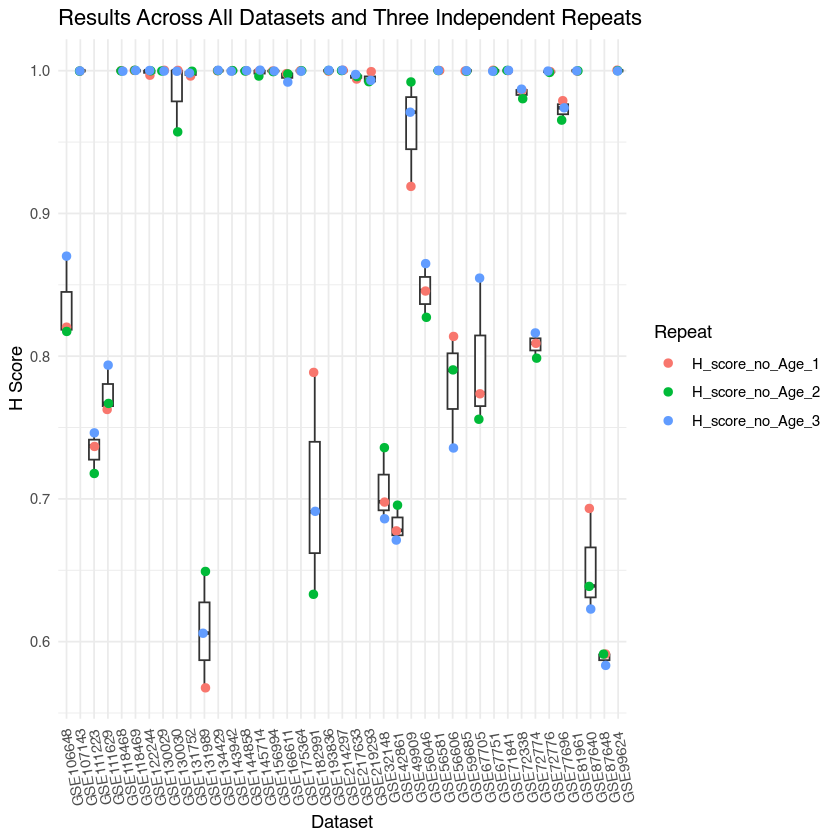

In [27]:
# library(ggplot2)
# library(tidyr)
# data <- read.csv("/tank/projects/vpalagina_hobotnica/hobotnica/clocks/PhenoAgeV2/Checking_for_HC1_2_reg/3_HCs_results.csv")

# data_long <- pivot_longer(data, 
#                           cols = starts_with("H_score_no_Age"), 
#                           names_to = "Repeat", 
#                           values_to = "H_score_value")
# ggplot(data_long, aes(x = factor(Dataset_ID), y = H_score_value)) +
#   geom_boxplot() + 
#   geom_jitter(aes(color = Repeat), width = 0.1, size = 2) +  
#   labs(title = "Results Across All Datasets and Three Independent Repeats",
#        x = "Dataset",
#        y = "H Score") +
#   theme_minimal() +
#   theme(axis.text.x = element_text(angle = 100, hjust = 0.5))


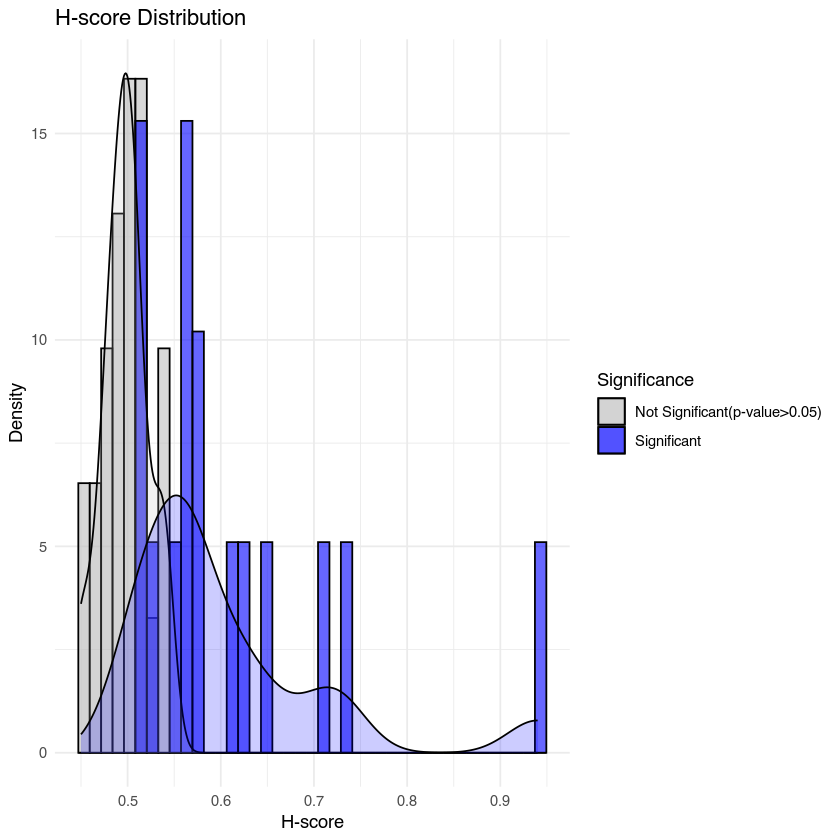

In [29]:
# library(ggplot2)

# # Load data
# ds <- read.csv("/tank/projects/vpalagina_hobotnica/hobotnica/clocks/PhenoAgeV2/rand_distrib_delta_calculation/PhenoAgeV2_final_res_with_delta.csv")
# data <- ds

# # Set p-value threshold
# p_value_threshold <- 0.05

# # Add a significance column
# data$Significance <- ifelse(data$p_value <= p_value_threshold, "Significant", "Not Significant(p-value>0.05)")

# # Plot histogram with density curve, using color to differentiate significance
# ggplot(data, aes(x = H_score, fill = Significance)) +
#   geom_histogram(aes(y = ..density..), bins = 41, color = "black", position = "identity", alpha = 0.6) +
#   geom_density(alpha = 0.2) +
#   labs(title = "H-score Distribution", x = "H-score", y = "Density") +
#   scale_fill_manual(values = c("Significant" = "blue", "Not Significant(p-value>0.05)" = "gray")) +
#   theme_minimal()

In [11]:
library(dplyr)
library(ggplot2)
library(ggfortify)
library(gridExtra)
library(grid)
##graphs for initial data and delta h_score visualization 
path_to_initial_H_score_distrib <- "/tank/projects/vpalagina_hobotnica/hobotnica/clocks/PhenoAgeV2/rand_distribution_classical_right_regression/PhenoAgeV2_result_distribution"
path_to_no_age_H_score_distrib <- "/tank/projects/vpalagina_hobotnica/hobotnica/clocks/PhenoAgeV2/logistic_regression_build_m_val/distribution_no_age"
data_for_pca_initial <- "/tank/projects/vpalagina_hobotnica/hobotnica/clocks/PhenoAgeV2/datasets_PhenoAgeV2_imputed_NA"
data_for_pca_no_age <- "/tank/projects/vpalagina_hobotnica/hobotnica/clocks/PhenoAgeV2/logistic_regression_build_m_val/substracted_age_M_values"

real_h_scores_data <- read.csv("/tank/projects/vpalagina_hobotnica/hobotnica/clocks/PhenoAgeV2/logistic_regression_build_m_val/final_res.csv")
all_plots <- list()
#nrow(real_h_scores_data)

for (i in 1:nrow(real_h_scores_data)) {
  dataset_name <- real_h_scores_data$Dataset_ID[i]
  real_h_score <- real_h_scores_data$H_score[i]
  pval <- real_h_scores_data$p_value[i]
  real_h_score_no_age <- real_h_scores_data$H_score_no_Age[i]
  pval_no_age <- real_h_scores_data$p_value_no_Age[i]
  
  initial_file <- file.path(path_to_initial_H_score_distrib, dataset_name)
  no_age_file <- file.path(path_to_no_age_H_score_distrib, paste0(dataset_name))
  
  random_h_scores_initial <- scan(initial_file, what = numeric())
  random_h_scores_no_age <- scan(no_age_file, what = numeric())

  plot_initial <- plot_distrib(random_h_scores_initial, real_h_score, pval)
  plot_no_age <- plot_distrib(random_h_scores_no_age, real_h_score_no_age, pval_no_age)
  
  #pca calculation
  initial_ds <- file.path(data_for_pca_initial, dataset_name)
  no_age_ds <- file.path(data_for_pca_no_age, dataset_name)
  
  initial_ds_data <- read.csv(initial_ds, sep = ",", header = TRUE, row.names = 1)
  no_age_ds_data <- read.csv(no_age_ds, sep = ",", header = TRUE, row.names = 1)
  p1 <- PCA_my_plot(initial_ds_data, dataset_name, "initial data")
  p2 <- PCA_my_plot(no_age_ds_data, dataset_name, "after removing Age variable")
  
  combined_plot <- arrangeGrob(plot_initial, p1, plot_no_age, p2, ncol = 2, nrow = 2)
  all_plots[[i]] <- combined_plot
}

pdf("M_value.pdf", width = 16, height = 16) 
for (i in seq(1, length(all_plots), by = 1)) {
  grid.newpage()
  grid.draw(all_plots[[i]])
}
dev.off()



Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


png 
  2

In [ ]:
#whole GSE67705 HIV vs HC - whole dataset
matrix <- without_age %>% select(-Condition, -Age)
distMatrix <- Dist(matrix)
Hobotnica(distMatrix, annotation)
#result 0.7956

#whole GSE67705 HIV vs HC range of age (40-50):
matrix <- df %>% select(-Condition, -Age)
distMatrix <- Dist(matrix)
Hobotnica(distMatrix, annotation)
#result 0.91

#whole GSE67705 HIV vs HC range of age (40-50):
matrix <- df %>% select(-Condition, -Age)
distMatrix <- Dist(matrix)
Hobotnica(distMatrix, annotation)
#result 0.657

#whole GSE67705 HIV vs HC - age == 52
matrix <- df %>% select(-Condition, -Age)
distMatrix <- Dist(matrix)
Hobotnica(distMatrix, annotation)
#result 0.66


#whole GSE56046 AS vs HC
matrix <- meta_and_cpgs %>% select(-Condition, -Age)
distMatrix <- Dist(matrix)
Hobotnica(distMatrix, annotation)
#result 0.4835